In [169]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from run_point import *
def rsign():
    return np.random.choice([1,-1])

pfs=pd.read_csv('selected_points.csv')
pf=pd.DataFrame()

for j in range(pfs.shape[0]):
    ps=pfs.ix[j]
    ps=run_point(ps.MnINPUT,ps.MDF,ps.lam,ps.tanb)

    MN=ps.MnINPUT;MDF=ps.MDF;lam=ps.lam;tanb=ps.tanb
    po=pd.Series({'MN':MN,'MDF':MDF,'lam':lam,'tanb':tanb}) #good point
    if not cuts_series(ps).cuts_all:
        sys.exit('Start from a good point')
        
    for i in range(400):
        if i%100==0: print i
        #Mnstep=0.;MDFstep=Mnstep;lamstep=0.;tanbstep=0.
        #Mnstep=0.5;MDFstep=Mnstep;lamstep=0.05;tanbstep=0.5
        Mnstep=0.5;MDFstep=Mnstep;lamstep=0.05;tanbstep=0.5
        MN=MN+rsign()*Mnstep; MDF=MDF+rsign()*MDFstep; lam=lam+rsign()*lamstep; tanb=tanb+rsign()*tanbstep
        ps=run_point(MN,MDF,lam,tanb)
        if cuts_series(ps).cuts_all and ps.z2_sigmav>sv:
            #print 'i:',i,j,ps.z2_sigmav
            MN=ps.MnINPUT;MDF=ps.MDF;lam=ps.lam;tanb=ps.tanb #Advance step
            po=pd.Series({'MN':MN,'MDF':MDF,'lam':lam,'tanb':tanb}) #good point
            pf=pf.append(ps,ignore_index=True)
            pf.to_csv('tmp.csv',index=False)
        else:
            MN=po.MN;MDF=po.MDF;lam=po.lam;tanb=po.tanb #returns to good point    
        #psbak=run_point(MN,MDF,lam,tanb)

0


In [186]:
%%bash
wc -l tmp.csv

4688 tmp.csv


In [187]:
pf=pd.read_csv('selected_points_all.csv')
pf.shape

(4114, 161)

In [188]:
pf=pf.append(pd.read_csv('tmp.csv')).reset_index(drop=True)
pf['Delta_Z']=pf.Gamma_Z0*pf['Z0 ->  Chi_1 Chi_1']
pf.to_csv('selected_points_all.csv',index=False)


In [189]:
pf=pd.read_csv('selected_points_all.csv')
pf.shape

(8801, 161)

In [190]:
pz=pf[pf['Delta_Z']>0.03]
opf=Oh2(pf)

In [191]:
po=pd.read_csv('selected_points.csv')

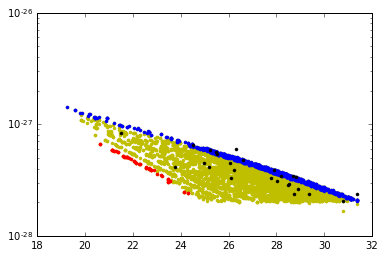

In [192]:
plt.semilogy(pf.Chi_1,pf.z2_sigmav,'y.')
plt.semilogy(pz.Chi_1,pz.z2_sigmav,'r.')
plt.semilogy(opf.Chi_1,opf.z2_sigmav,'b.')
plt.semilogy(po.Chi_1,po.z2_sigmav,'k.')

#plt.semilogy(pm.Chi_1,pm.z2_sigmav,'c.')

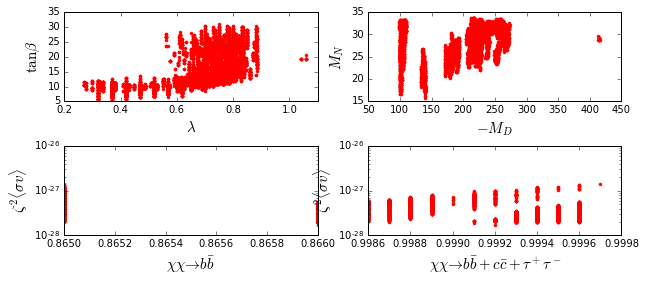

In [193]:
spf=pf
#fig, axes = plt.subplots(nrows=2, ncols=2)
#fig.tight_layout()
fig=plt.figure()
fig.subplots_adjust(hspace=0.5,wspace=0.2,left=0.01,right=1.3)
fig.add_subplot(221)
plt.plot(spf['lambda'],spf.tanb,'r.')
plt.xlabel(r'$\lambda$',size=15)
plt.ylabel(r'$\tan\beta$',size=15)
fig.add_subplot(222)
plt.plot(-spf.MDF,spf.MnINPUT,'r.')
plt.xlabel(r'$-M_D$',size=15)
plt.ylabel(r'$M_N$',size=15)
fig.add_subplot(223)
plt.semilogy(spf['ID_br:~Chi1,~Chi1 -> d3 D3'],spf.z2_sigmav,'r.')
plt.xlabel(r'$\chi\chi\to b\bar{b}$',size=15)
plt.ylabel(r'$\zeta^2\langle\sigma v\rangle$',size=15)
fig.add_subplot(224)
plt.semilogy(spf['ID_br:~Chi1,~Chi1 -> d3 D3']+spf['ID_br:~Chi1,~Chi1 -> u2 U2']+spf['ID_br:~Chi1,~Chi1 -> e3 E3'],spf.z2_sigmav,'r.')
plt.xlabel(r'$\chi\chi\to b\bar{b}+c \bar{c}+\tau^+\tau^-$',size=15)
plt.ylabel(r'$\zeta^2\langle\sigma v\rangle$',size=15)

In [37]:
ps=pf[pf.MDF.abs()==pf.MDF.abs().max()].reset_index(drop=True).ix[0]
cuts_series(ps)

cuts_a_Omega_h2         True
cuts_all                True
cuts_b_Br_inv           True
cuts_c_R_gamma_gamma    True
cuts_d_z_DD             True
cuts_e_LHC              True
cuts_f_STU              True
dtype: bool

In [38]:
ps.z2_sigmav

1.9383253455299998e-28

In [39]:
pd.read_csv('selected_points.csv').MDF.abs().max()

413.48679599999997

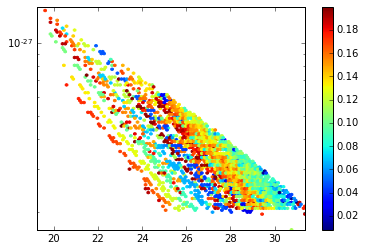

In [209]:
plt.hexbin(pf.Chi_1,pf.z2_sigmav,pf.T_par_new,yscale='log')
plt.colorbar()

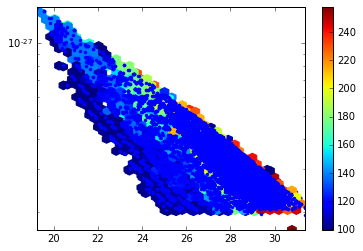

In [248]:
m=200
plt.hexbin(pf[pf.MDF.abs()<m].Chi_1,pf[pf.MDF.abs()<m].z2_sigmav,pf[pf.MDF.abs()<m].MDF.abs(),yscale='log',gridsize=30)
m=300
plt.hexbin(pf[pf.MDF.abs()<m].Chi_1,pf[pf.MDF.abs()<m].z2_sigmav,pf[pf.MDF.abs()<m].MDF.abs(),yscale='log',gridsize=30)
plt.colorbar() #ticks=[100,200,300,400])

In [227]:
plt.colorbar?

In [ ]:
data = np.loadtxt('limits_bb.txt')
A1 = data[:,0] #mass
B1 = data[:,26] #composite limits from all dwarfs

forecasting = ( np.sqrt(10)/np.sqrt(6) ) * (60./15.) # 10 yr obs and 60 dwarfs compared to 15 dwarfs with 6 yrs of data.


In [451]:
pf=pf.sort_values('Chi_1')

(18, 31)

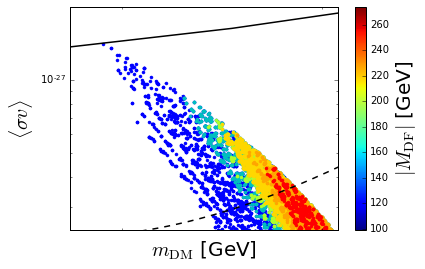

In [461]:
pm=pf[pf.MDF.abs()>160]
pmm=pf[pf.MDF.abs()>185]
pmmm=pf[pf.MDF.abs()>210]
pmmmm=pf[pf.MDF.abs()>230]
pmmmmm=pf[pf.MDF.abs()>260]
plt.semilogy(pf.Chi_1,pf.z2_sigmav,'b.')
plt.semilogy(pm.Chi_1,pm.z2_sigmav,'c.')
plt.semilogy(pmm.Chi_1,pmm.z2_sigmav,'.',color='#ADFF2F')
plt.semilogy(pmmm.Chi_1,pmmm.z2_sigmav,'.',color='#FFD700')
plt.semilogy(pmmmm.Chi_1,pmmmm.z2_sigmav,'.',color='#FFA500')
plt.semilogy(pmmmmm.Chi_1,pmmmmm.z2_sigmav,'.',color='r')
m=300
plt.hexbin(pf[pf.MDF.abs()<m].Chi_1,pf[pf.MDF.abs()<m].z2_sigmav,pf[pf.MDF.abs()<m].MDF.abs(),yscale='log',gridsize=500)
ac=plt.colorbar()
ac.set_label(r'$|M_{\rm DF}|$ [GeV]',size=20)
plt.loglog(A1, B1*(1./forecasting), 'k',linewidth=1.5, color='black',label=r'60 dwarfs, 10 yr - Fermi LAT')
plt.plot(pf.Chi_1,AMS(pf.Chi_1),'k--',lw=1.5,label='AMS-02')
#plt.legend(loc='best')
plt.ylabel(r'$\langle\sigma v\rangle$',size=20)
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylim(2.4E-28,2E-27)
plt.xlim(18,31)


In [463]:
pfe=pd.read_csv('not_T.csv')

(8, 31)

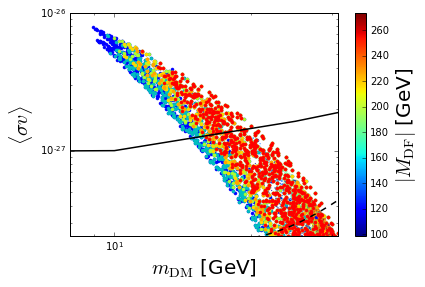

In [473]:

pm=pfe[pff.MDF.abs()>160]
pmm=pfe[pfe.MDF.abs()>185]
pmmm=pfe[pfe.MDF.abs()>210]
pmmmm=pfe[pfe.MDF.abs()>230]
pmmmmm=pfe[pfe.MDF.abs()>260]
#pmmmmm=pfe[pfe.MDF.abs()>600]
plt.semilogy(pfe.Chi_1,pfe.z2_sigmav,'b.')
plt.semilogy(pm.Chi_1,pm.z2_sigmav,'c.')
plt.semilogy(pmm.Chi_1,pmm.z2_sigmav,'.',color='#ADFF2F')
plt.semilogy(pmmm.Chi_1,pmmm.z2_sigmav,'.',color='#FFD700')
plt.semilogy(pmmmm.Chi_1,pmmmm.z2_sigmav,'.',color='#FFA500')
plt.semilogy(pmmmmm.Chi_1,pmmmmm.z2_sigmav,'.',color='r')
m=300
plt.hexbin(pf[pf.MDF.abs()<m].Chi_1,pf[pf.MDF.abs()<m].z2_sigmav,pf[pf.MDF.abs()<m].MDF.abs(),yscale='log',gridsize=500)
ac=plt.colorbar()
ac.set_label(r'$|M_{\rm DF}|$ [GeV]',size=20)
plt.loglog(A1, B1*(1./forecasting), 'k',linewidth=1.5, color='black',label=r'60 dwarfs, 10 yr - Fermi LAT')
plt.plot(pf.Chi_1,AMS(pf.Chi_1),'k--',lw=1.5,label='AMS-02')
#plt.legend(loc='best')
plt.ylabel(r'$\langle\sigma v\rangle$',size=20)
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylim(2.4E-28,1E-26)
plt.xlim(8,31)


In [469]:
pfe.MDF.abs().max()

937.34008499999993

In [ ]:
pff=pff.append(pf)
pff=pff.reset_index(drop=True)
pff['MDF_abs']=pff.MDF.abs()

In [301]:
pff=pff.sort_values('MDF_abs')

In [311]:
tics=np.array([100,101])
for i in range(tics.shape[0]-1):
    print i

0


In [388]:
c=pd.DataFrame()
tics=np.array([100,101,102,110,120,139,150,160,190,200,220,240,260,280,350,370,420,450,480,490,\
              500,580,600,650,710,770,790,820,840,880,900])
for i in range(tics.shape[0]-1):
    cc=pff[np.logical_and(pff.MDF_abs>tics[i],pff.MDF_abs<tics[i+1])]
    if cc.shape[0]>0:
        c=c.append(cc[cc.T_par_new==cc.T_par_new.min()].reset_index(drop=True).ix[0],ignore_index=True)

In [405]:
c[['MDF_abs','T_par_new']].to_csv('tmpfit.csv',index=False)

In [407]:
cf=pd.read_csv('tmpfit.csv')
cf

,MDF_abs,T_par_new
0,100.578239,0.008667
1,101.578239,0.008561
2,107.578239,0.007959
3,118.061205,0.011958
4,135.180202,0.019672
5,139.352387,0.021041
6,158.533122,0.024729
7,181.274494,0.032368
8,193.461719,0.038217
9,216.937002,0.045957


poly1d([  0.47864276,  -3.61892938,  11.3103959 , -14.07101015])

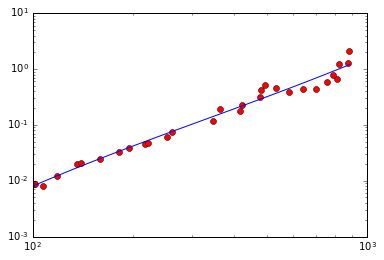

In [410]:

x=cf.columns[0]
y=cf.columns[1]
cs=curvefit(cf[x].values,cf[y].values)
cs.add_fit(3)

In [425]:
cs(pff.MDF.abs()).shape

(17646,)

In [427]:
np.ones(cs(pff.MDF.abs()).shape)

(17646,)

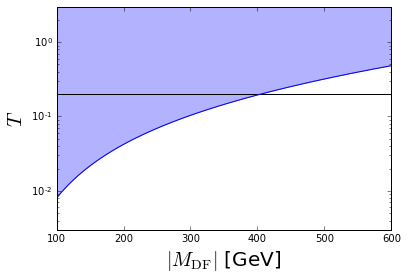

In [445]:

        
#plt.semilogy(pff.MDF.abs(),pff.T_par_new,'y.') #pff['h0 ->  Chi_1 Chi_1'],yscale='log')
#plt.semilogy(c.MDF.abs(),c.T_par_new,'k--') #pff['h0 ->  Chi_1 Chi_1'],yscale='log')
#plt.semilogy(c.MDF.abs(),c.T_par_new,'ro') #pff['h0 ->  Chi_1 Chi_1'],yscale='log')
plt.semilogy(pff.MDF.abs(),cs(pff.MDF.abs()),'b-')
plt.fill_between(pff.MDF.abs(),cs(pff.MDF.abs()),3*np.ones(cs(pff.MDF.abs()).shape),alpha=0.3)
plt.hlines(0.2,100,1000)
plt.xlim(100,600)
plt.ylim(3E-3,3)
plt.xlabel(r'$|M_{\rm DF}|$ [GeV]',size=20)
plt.ylabel(r'$T$',size=20)

(10, 30)

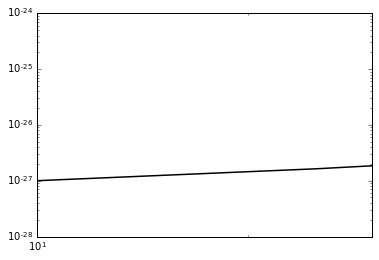

In [448]:
data = np.loadtxt('limits_bb.txt')
A1 = data[:,0] #mass
B1 = data[:,26] #composite limits from all dwarfs

forecasting = ( np.sqrt(10)/np.sqrt(6) ) * (60./15.) # 10 yr obs and 60 dwarfs compared to 15 dwarfs with 6 yrs of data.

plt.loglog(A1, B1*(1./forecasting), 'k',linewidth=1.5, color='black',label=r'60 dwarfs, 10 yr - Fermi LAT')
plt.xlim(10,30)

In [218]:
pff=pd.read_csv('region_of_interest.csv')

(100, 450)

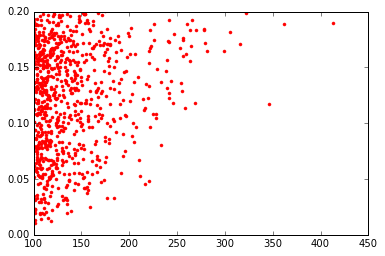

In [225]:
plt.plot(pff.MDF.abs(),pff.T_par_new,'r.')
plt.ylim(0,0.2)
plt.xlim(100,450)

In [226]:
pf.lam.min()

0.26869641134799999